In [1]:
import numpy as np
import pandas as pd 
import glob 
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import random
from sklearn.metrics import mean_squared_error, root_mean_squared_error


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from Math_From_Scratch import regression ,error_metrics, activation

In [2]:
datasets_path = glob.glob(r'..\data\*.csv')

csv_files = {
    path.split("\\")[-1][:-4]: path
    for path in datasets_path
}

WINDOW_SIZE = 5

df = pd.read_csv(csv_files['dehliclimate'])
df['date'] = pd.to_datetime(df['date'])

features = df.drop(columns=['meantemp','date']).columns
all_metrics = df.drop(columns=['date']).columns

df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_of_week
df['year'] = df['date'].dt.year


target = ["meantemp"]

X = df[features]
y = df[target]

val_size = 150

X_val = X[-val_size:]
y_val = y[-val_size:]
X_train = X[:-val_size]
y_train = y[:-val_size]


In [123]:
y_pred, intercept , coef = regression.multiple_regression(X_train,y_train, return_params=True) 

In [3]:
def L2_Ridge_Squared(weights: np.array, alpha: float = 1)-> float:
    """Squared L2 Norm for Ridge Regularization, Used for weights Optmization"""
    l2_squared = alpha/2 * np.sum(np.power(weights, 2))
    return l2_squared

In [24]:
W_SIZE = len(list(features))

alpha = 2.7
weights = np.array([])
bias = 0 #random.random()*0.001
weights = np.array([-0.24327174,  0.17098969, -0.0014226])
#for w in range(W_SIZE):
 #   weights = np.append(weights,0.0001) #np.append(weights,random.random() * 0.000001)

lr = 0.000001

m, n = X_train.shape 
x = X_train.values
y = y_train.values.reshape(len(y_train))

cost_hist = []
weight_hist = []
bias_hist = []
loss_hist = []


for epoch in range(20000):
        if np.any(np.isnan(weights)) or np.any(np.isinf(weights)):
            print("Numerical instability detected")
            break

        pred = X_train.dot(weights) + bias
        pred = activation.relu(pred)


        error = pred - y


        mse  = np.mean((pred - y)**2)
        l2 = L2_Ridge_Squared(weights, alpha)
        mse_reg = mse + l2

        if epoch % 1000 == 0:
            print("MSE", mse_reg)

        

        dw = (1 / m) * x.T.dot(error) + alpha * weights
        db = np.mean(error)


        weights -= lr * dw
        bias -= lr * db

        cost_hist.append(mse_reg)
        weight_hist.append(weights.copy())
        bias_hist.append(bias)
        #loss_hist.append(rmse)


print("Weights:", weights)
print("Bias", bias)





MSE 702.4238252910748
MSE 79.62907029057185
MSE 75.79456840576901
MSE 73.95894659303038
MSE 73.02419582161177
MSE 72.48673591520911
MSE 72.1277263686924
MSE 71.85193204435159
MSE 71.61777334277393
MSE 71.40696315187155
MSE 71.21132891620448
MSE 71.02709428951566
MSE 70.85239833244701
MSE 70.68621954875951
MSE 70.52790932152436
MSE 70.37698957871706
MSE 70.23306495090598
MSE 70.0957844935364
MSE 69.96482483993192
MSE 69.83988260680641
Weights: [-0.04580023  0.35415281  0.02457219]
Bias 0.01904275254937078


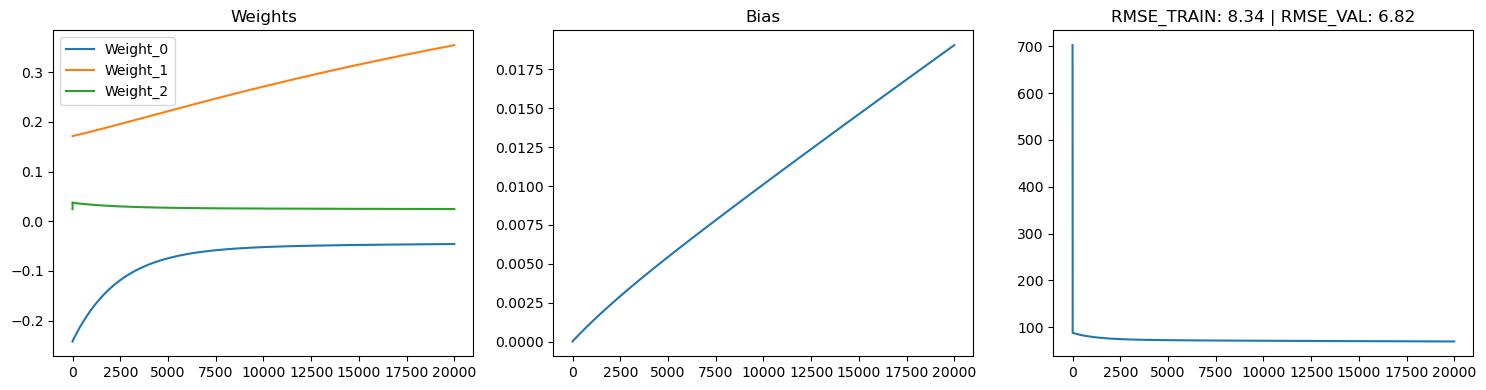

In [25]:
pred_last_train = X_val.dot(weights) + bias
grad_results = y_val.copy()
grad_results['pred'] = pred_last_train
grad_results['residual'] = y_val.iloc[:,0] - grad_results['pred']
val_rmse = root_mean_squared_error(grad_results['meantemp'],grad_results['pred'])
train_rmse = root_mean_squared_error(y_train['meantemp'],X_train.dot(weights) + bias)

fig, ax =plt.subplots(1,3 , figsize=(15,4))
ax[0].set_title("Weights")
for w in range(W_SIZE):
    ax[0].plot([entry[w] for entry in weight_hist], label=f'Weight_{w}')
ax[0].legend()

ax[1].set_title("Bias")
ax[1].plot(np.arange(len(cost_hist)),bias_hist)
ax[2].set_title(f"RMSE_TRAIN: {round(train_rmse,2)} | RMSE_VAL: {round(val_rmse,2)}")
ax[2].plot(np.arange(len(cost_hist)),cost_hist)
plt.tight_layout()
plt.show()